# "Pre-lecture" HW
*Links for #3:* 

https://chatgpt.com/share/66e9a852-de88-8005-985a-7ca22b5f1feb

https://chatgpt.com/share/66e9d242-8c48-8005-a0a0-488be8c667f5

## 1. Begin (or restart) part "3(a)" of the TUT Demo and interact with a ChatBot to make sure you understand how each part the Monte Hall problem code above works
The Monte Hall problem code is below:

In [1]:
# Monte Hall Simulation Code -- not the only way to code this, but it's what Prof. Schwartz came up with...

import numpy as np
all_door_options = (1,2,3)  # tuple
my_door_choice = 1  # 1,2,3
i_won = 0
reps = 100000
for i in range(reps):
    secret_winning_door = np.random.choice(all_door_options)
    all_door_options_list = list(all_door_options)
    # take the secret_winning_door, so we don't show it as a "goat" losing door
    all_door_options_list.remove(secret_winning_door)
    try:
        # if my_door_choice was secret_winning_door then it's already removed
        all_door_options_list.remove(my_door_choice)
    except:
        pass
    # show a "goat" losing door and remove it
    goat_door_reveal = np.random.choice(all_door_options_list)
    all_door_options_list.remove(goat_door_reveal)

    # put the secret_winning_door back in if it wasn't our choice
    # we previously removed it, so it would be shown as a  "goat" losing door
    if secret_winning_door != my_door_choice:
        all_door_options_list.append(secret_winning_door)
    # if secret_winning_door was our choice then all that's left in the list is a "goat" losing door
    # if secret_winning_door wasn't our choice then it's all that will be left in the list

    # swap strategy
    my_door_choice = all_door_options_list[0]

    if my_door_choice == secret_winning_door:
        i_won += 1

i_won/reps

0.66825

**By asking ChatGPT I get:**

This code simulates the Monty Hall problem using a "switching" strategy, where the contestant always switches their initial door choice after one of the non-winning doors (a "goat" door) is revealed. Here's a breakdown of the process:

1. **Initial Setup:**
   - `all_door_options = (1, 2, 3)` defines three possible doors, one of which hides the winning prize (e.g., a car) while the others hide "goats."
   - `my_door_choice = 1` is the initial choice of the contestant. It's arbitrarily set to door 1 at the start.
   - `i_won = 0` is a counter for the number of times the contestant wins (i.e., picks the door with the car after switching).
   - `reps = 100,000` specifies the number of simulations to run.

2. **Main Simulation Loop:**
   - For each iteration of the loop, a random winning door (`secret_winning_door`) is selected using `np.random.choice(all_door_options)`.
   - A list `all_door_options_list` is created from the tuple `all_door_options`, and the `secret_winning_door` is removed from this list to prevent it from being revealed as a "goat" door.
   - The contestant's current door choice (`my_door_choice`) is also removed from `all_door_options_list`. This prevents the door they initially chose from being revealed as a losing door.
   - One of the remaining doors (`goat_door_reveal`) is randomly chosen and removed from the list, representing Monty Hall revealing a goat behind one of the doors the contestant did not pick.

3. **Switching Strategy:**
   - If the contestant's initial choice (`my_door_choice`) was not the winning door, the `secret_winning_door` is added back to the list of doors. This models the situation after Monty reveals a goat, leaving one door (the winning door) and the other door (the contestant's initial pick).
   - The contestant now switches to the remaining door (`my_door_choice = all_door_options_list[0]`).

4. **Check for a Win:**
   - If, after switching, the contestant’s choice (`my_door_choice`) matches the `secret_winning_door`, they win, and the counter `i_won` is incremented.

5. **Output:**
   - Finally, the code outputs the proportion of wins by dividing `i_won` by the total number of repetitions (`reps`). This will approximate the probability of winning by always switching doors in the Monty Hall problem, which is typically around 2/3.

### Key Insights:
- The code implements the strategy where the contestant always switches doors, which in the Monty Hall problem increases the chance of winning from 1/3 (if they stick with their initial choice) to 2/3.


**In my point of view:**

In this code we can see that initially we have 3 doors and 100000 try out, also we have already choose door 1. In every try out, we randomly choose the secret winning door, and then we remove it from the list of all door options. Then we remove the door we choose. After that, We randomly choose a goat door from the remaining doors. And from these doors, we remove the goat door, and if the secret door isn't my choice, then we are going to add the secret winning door into the list of door options. Then we swap our strategy which means we change our choice, and if the door we choose at the end is the secret door then we win otherwise we lost.
So the code before the for loop is the set-up, and in the for loop, we use `np.random.choice(all_door_options)` to represent we randomly choose a door. During the for loop we use try/except statement to handle error that may occur. After that we use if/else statement to switch strategy and check for a win.

## 2. Extend your ChatBot sessions to now address part "3(b)" of the TUT Demo and interact with your ChatBot to see if it can suggest a simpler, more streamlined way to code up this for loop simulation so the process is more clear and easier to understand; then, describe any preferences you have in terms of readibility or explainability between the original code and the code improvements suggested by the ChatBot


Here are the preferences I have in terms of readibility or explainability:
- Change the switch strategy more clearly. In the previous code, it is hard to fully understand why we are using `my_door_choice = all_door_options_list[0]` to switch strategy. Also I think the naming should also be improved.
- Simplified list handling, instead of converting the tuple to a list and back, the doors are consistently represented as a list.
- Random initial door choice, the player’s initial choice is randomized in every iteration, which adds more flexibility compared to the original hardcoded my_door_choice = 1.
- Clearer door removal, the remaining doors are determined using list comprehensions, making the logic simpler and easier to understand.


## 3. Submit your preferred version of the Monty Hall problem that is verified to be running and working with a final printed output of the code; then, add code comments explaining the purpose of each line of the code

In [4]:
import numpy as np

# Setup
doors = [1, 2, 3]  # There are three doors
wins = 0           # Track the number of times the player wins
trials = 100000    # Number of times we run the simulation

# Simulation
for _ in range(trials):
    winning_door = np.random.choice(doors)  # Randomly pick the winning door
    player_choice = np.random.choice(doors)  # Player randomly picks a door

    # Monty opens a door with a goat (not the player's choice or the winning door)
    available_doors = [door for door in doors if door != player_choice and door != winning_door]
    monty_opens = np.random.choice(available_doors)  # Monty shows a goat door

    # Player switches to the remaining unopened door
    remaining_door = [door for door in doors if door != player_choice and door != monty_opens][0]

    # Check if the player wins by switching
    if remaining_door == winning_door:
        wins += 1

# Calculate win rate
win_rate = wins / trials
win_rate


0.6666

## 4. Watch the embedded video tutorial on Markov chains in the next Jupyter cell below to understand their application and relevance for ChatBots; then, after watching the video, start a new ChatBot session by prompting that you have code that creates a "Markovian ChatBot"; show it the first version of the "Markovian ChatBot code" below; and interact with the ChatBot session to make sure you understand how the original first version of the "Markovian ChatBot code" works
*link of chat history:* https://chatgpt.com/share/66eafa0e-b64c-8005-8a1f-b155596d7925

This is the video:

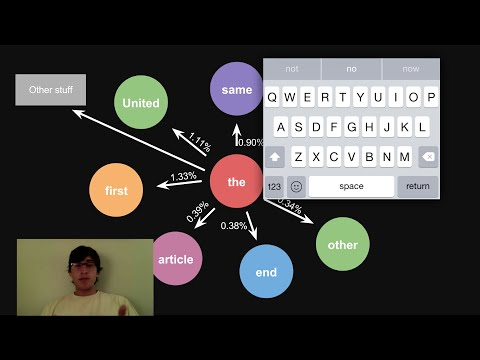

In [2]:
# Markov Chains and Text Generation
from IPython.display import YouTubeVideo
YouTubeVideo('56mGTszb_iM', width = 550)

Here is the Markovian Chatbot code:

In [ ]:
# Markovian Chatbot

# from collections import defaultdict
word_used = dict() # defaultdict(int)
next_word = dict() # defaultdict(lambda: defaultdict(int))
for i,word in enumerate(words[:-1]):

    if word in word_used:
        word_used[word] += 1
    else:
        word_used[word] = 1
        next_word[word] = {}

    if words[i+1] in next_word[word]:
        next_word[word][words[i+1]] += 1
    else:
        next_word[word][words[i+1]] = 1

A Markov chain is a stochastic (random) process where the next state (in this case, the next word in a sentence) depends only on the current state (the current word). In a chatbot, a Markov chain can be used to predict what word will come next based on the current word and what words are likely to follow it. The code can be divided into four parts:

- The first part is to set up initial variables. The code sets up two dictionaries. The first dictionary keeps track of how many times each word appears in the dataset and the other dictionary tracks which words follow each word, and how often that happens.


- And the second part is the for loop. The loop goes through the list words (except the last word). words presumably contains the tokenized words from the input text. For each word at position i, the code looks at both the word itself and the word that follows it `words[i+1]`. `words[:-1]` is a slice operation on the list `words` The slice `[:-1]` means "take all elements of `words` **except the last one**." And `enumerate()` is a Python built-in function that returns both the index and the value of each element in the list. As a result `i` represents the index and `word` represent the value of the element.


- The third part is to track word usage. If the `word` has already been seen, its count is incremented by 1. Otherwise, it's added to the `word_used` dictionary with a count of 1, and an empty dictionary is initialized for `next_word[word]` to track what words come after it.

 
- The last part is to track word transitions. There is an if/else statement with the condition of whether the next word is in the `next_word` list. If the next word `words[i+1]` has already been seen as a follow-up to the current `word`, its count is incremented. Otherwise, we add it into the `next_word` list and count it as 1.

# "Pre-lecture" HW


## 5. Recreate (or resume) the previous ChatBot session from question "4" above, and now prompt the ChatBot session that you have a couple extensions of the code to show it, and then show it each of the extentions of the "Markovian ChatBot code" below in turn


### 5.1 Without just supplying your ChatBot session with the answers, see if the ChatBot can figure out what the extensions in the code do; namely, making character specific Markov chains, and using bigrams (rather than just the previous word alone) dependency... prompt your ChatBot session with some hints if it's not seeming to "get it"

The answer the ChatBot gave me is: https://chatgpt.com/share/66eafa0e-b64c-8005-8a1f-b155596d7925 (Since I continue using the same chat, this link includes both chat history of 5.1 and 5.2)

### 5.2 Interact with your ChatBot session to have it explain details of the code wherever you need help understanding what the code is doing and how it works
*link of chat history:*  https://chatgpt.com/share/66eafa0e-b64c-8005-8a1f-b155596d7925 ((Since I continue using the same chat, this link includes both chat history of 5.1 and 5.2))

The extension code is below:

In [ ]:
# Markovian Chatbot Extension #1

word_used2 = defaultdict(int)
next_word2 = defaultdict(lambda: defaultdict(int))
for i,word in enumerate(words[:-2]):
    word_used2[word+' '+words[i+1]] += 1
    next_word2[word+' '+words[i+1]][words[i+2]] += 1 

Instead of only looking at one word to predict the next word, this model now looks at two consecutive words (a word pair) to predict the following word. This is often called a bigram model, where you use two-word contexts to make predictions. By using word pairs, the model has more context, making it better at generating coherent sentences. The idea is that the likelihood of a word depends on the two words preceding it rather than just the immediately preceding word. 

for the first part, the code set up the initial variables `word_used2` and `next_word2`.

- `word_used2` is a dictionary that keeps track of how many times a pair of consecutive words appears in the text.

- `next_word2` is similar to the `next_word` dictionary in the original code, but now it tracks what words come after a pair of words (bigram), instead of just after a single word.

The last part is looping with two-word context. `word + ' ' + words[i+1]` creats two consecutive words, with a space between them. After that, `word_used2[word + ' ' + words[i+1]] += 1` records how many times each word pair occurs and `next_word2[word + ' ' + words[i+1]][words[i+2]] += 1` records what word follows the word pair.

#### A detailed explanation of `next_word2[word+' '+words[i+1]][words[i+2]] += 1 `

1. `word + ' ' + words[i+1]` (Creating a Bigram)

2. `next_word2[word + ' ' + words[i+1]]` (Accessing or Initializing the Bigram Dictionary) 
`next_word2` is a nested dictionary (a dictionary of dictionaries). It keeps track of all the possible words that can follow each bigram. For the bigram "hello there", `next_word2["hello there"]` might look like this:

In [ ]:
next_word2["hello there"] = {"friend": 2, "world": 1}

This tells us that the word `"friend"` followed `"hello there"` 2 times, and `"world"` followed it once. Because we use the **`defaultdict`** , if the bigram `"hello there"` does not already exist in `next_word2`, a new inner dictionary will automatically be created.

### 5.3 Start yet another new ChatBot session and first show the ChatBot the original "Markovian ChatBot code" below, and then tell ChatBot that you have an extension but this time just directly provide it the more complicated final extension without ever providing the intermediate extension code to the ChatBot session and see if it's still able to understand everything extension does; namely, making character specific Markov chains, and using bigrams (rather than just the previous word alone) dependency... prompt the ChatBot with some hints if it's not seeming to understand what you're getting at...
*link of chat history:*  https://chatgpt.com/share/66eb0ec3-9a74-8005-9101-7174ea06f2e3

In [ ]:
# Markovian Chatbot Extension #2

from collections import Counter, defaultdict
# `avatar` is a dataset, and `character` is one of it's columns
characters = Counter("\n"+ avatar.character.str.upper().str.replace(' ','.')+":")
# this code changes the type of the `character` column to `str`; then,
# makes the text uppercase, and replaces spaces with '.'

nested_dict = lambda: defaultdict(nested_dict)
word_used2C = nested_dict()
next_word2C = nested_dict()

for i,word in enumerate(words[:-2]):
    if word in characters:
        character = word
        
    if character not in word_used2C:
        word_used2C[character] = dict()
    if word+' '+words[i+1] not in word_used2C[character]:
        word_used2C[character][word+' '+words[i+1]] = 0
    word_used2C[character][word+' '+words[i+1]] += 1
    
    if character not in next_word2C:
        next_word2C[character] = dict()
    if word+' '+words[i+1] not in next_word2C[character]:
        next_word2C[character][word+' '+words[i+1]] = dict()
    if words[i+2] not in next_word2C[character][word+' '+words[i+1]]:
        next_word2C[character][word+' '+words[i+1]][words[i+2]] = 0
    next_word2C[character][word+' '+words[i+1]][words[i+2]] += 1


#### Initial Setup

`from collections import Counter, defaultdict` in this code, we import `Counter` and `defaultdict`.

- **`Counter`**: This is a subclass of `dict` from Python's `collections` module. It helps count the occurrences of elements in a collection (like a list or string). In our case, it's used to count the frequency of character names.
  
- **`defaultdict`**: This is another specialized `dict` from `collections`. It automatically initializes a key with a default value if it doesn’t exist yet, which eliminates the need for checking and creating new entries in dictionaries.

#### Processing the `character` Data

`characters = Counter("\n"+ avatar.character.str.upper().str.replace(' ','.')+":")`

- **`avatar.character`**: This accesses the `character` column in the `avatar` dataset. Each entry in this column represents a character in uppercase form (e.g., "JOHN DOE").
  
- **`str.upper()`**: Converts all character names to uppercase to ensure consistency (e.g., "John Doe" becomes "JOHN DOE").
  
- **`str.replace(' ', '.')`**: Replaces spaces in the names with dots (e.g., "JOHN DOE" becomes "JOHN.DOE").
    
- **`Counter`**: After this string manipulation, `Counter` is used to count the frequency of each transformed character name in the dataset.

This code changes the type of the `character` column to `str`; then, makes the text uppercase, and replaces spaces with '.'

#### Defining the Data Structures

- **`nested_dict = lambda: defaultdict(nested_dict)`**: This lambda function recursively creates a nested dictionary. It allows you to create multiple levels of `defaultdict` objects. So, when you access a key that doesn’t exist at any level, it will automatically create a new `defaultdict` at that level.

This structure allows you to store and update data like this without having to initialize each level.

- **`word_used2C`**: This dictionary stores the **bigram (pair of consecutive words)** counts for each character.
  
- **`next_word2C`**: This dictionary stores what word comes after each bigram.

#### Main Loop

- **`words[:-2]`**: This takes all words in the list `words` except the last two. This is necessary because you need at least three consecutive words to create a trigram.
  
- **`if word in characters`**: Checks if the current word is a character name from the `characters` dictionary. If it is, it assigns that word to the variable `character`. This ensures that we are correctly attributing the following bigrams and trigrams to the current character.

#### Updating Bigram Counts

- **`bigram`**: A bigram is simply a pair of two consecutive words. In this line, the current word (`word`) and the next word (`words[i + 1]`) are concatenated with a space in between to form a bigram. For example, if `word` is "hello" and `words[i+1]` is "there", the bigram becomes `"hello there"`.
  
- **`word_used2C[character][bigram] += 1`**: This updates the count of the bigram for the current character. If the bigram doesn’t exist for the character yet, it is automatically initialized to 0 (thanks to `defaultdict`), and the count is then incremented.

#### Updating Trigram Counts

- **Trigram**: A trigram consists of a bigram followed by a third word. Here, the word that follows the current bigram is `words[i + 2]`.
  
- **`next_word2C[character][bigram][words[i + 2]] += 1`**: This updates the count of the trigram for the current character. Specifically, it stores how many times a specific word (i.e., `words[i + 2]`) follows a given bigram (i.e., `bigram`).

The `defaultdict` ensures that the structure can go three levels deep (`character -> bigram -> next_word`), creating each level if it doesn't exist yet.

#### Final Data Structure

By the end of the loop, the two dictionaries (`word_used2C` and `next_word2C`) store:
- **`word_used2C`**: Contains counts of bigrams for each character. 

- **`next_word2C`**: Contains counts of what word comes after each bigram.
  
This extended Markov model allows you to simulate not just single-word transitions but **bigram-to-trigram** transitions based on character-specific speech patterns.

## 6. Report on your experience interacting with ChatBots to understand the Monte Hall problem and "Markovian ChatBot" code


### 6.1 Discuss how quickly the ChatBot was able to be helpful for each of the above questions, and if so, how?


I think ChatBot helped me a lot in coing part. When I prompting a code into the ChatBot, it will directly show me the logic of the code. And if I have any question, I can just ask for more detail about that. Besides, since I was using ChatGPT it will break down the code, and explain them individually. At the end it will summarize the code. I think it is really helpful. It helped me save time that I would have spent deciphering the code.

### 6.2 Discuss whether or not interacting with ChatBot to try to figure things out was frustrating or unhelpful, and if so, how?


Yes, I remember when I asking ChatGPT to provide me a url that directly links to an available CSV file, it just kept giving me a unvalid url. And sometimes even I told it to give me the url that I can copy and paste, it would still give me the file name with the hyperlink. Also after I giving ChatGPT the valid url file that links to an CSV file and ask it to read the CSV file. It would generate a python code, but that code was really just a code frame which didn't contain the url.

### 6.3 Based on your experiences to date (e.g., including using ChatBots to troubleshoot coding errors in the previous homework), provide an overall assessment evaluating the usefulness of ChatBots as tools to help you understand code

I found chatbot very helpful in helping me to interpret and understand the code, perhaps because I provided it with all the resources it needed, i.e., the code it needed to interpret, so there were very few errors when interacting with chatbot and it was easy and effortless to communicate with it. The chatbot is also very efficient when it comes to asking for help in modifying the code. However, there were times when the chatbot's answers were not what I expected. It will ignore some of my instructions, or just give a generalized solution without details, and this time the communication with chatbot will be very inefficient. All in all, despite the fact that it was a little difficult to communicate with chatbot at times, I found chatbot to be an efficient tool to help me understand my code.

## 7. Reflect on your experience interacting with ChatBot and describe how your perception of AI-driven assistance tools in the context of learning coding, statistics, and data science has been evolving (or not) since joining the course


At first I think AI-driven assistance tools are hard to trust. However, after I joined this course I found that AI-driven tools have streamlined the process of learning coding and statistics for me. They've acted as on-demand resources, quickly answering questions, providing code snippets, and offering explanations that are tailored to my level of understanding. This has saved me time that would have otherwise been spent searching through documentation or forums. I've been surprised at how well these tools can break down complex statistical and data science concepts. So I think ChatBot can be an active learning partner rather than just the reference.

## 8. ChatBots consume text data available on the web or platforms, and thus represents a new way to "search consensensus" that condenses and summarizes mainstream human thought


### 8.1 Start a new ChatBot session and discuss the relevance of learning and adaptability, communication, coding, and statistics and data analysis as skills in the modern world, especially with respect to career opportunities (particularly in the context of the data science industry)

### 8.2 See if ChatBot thinks you could be a statistician or data scientist without coding or doing data analysis, and then transition your ChatBot conversation into a career exploration discussion, using the ChatBot to identify the skills that might be the most valuable for a career that you're interested

### 8.3 Ask for a summary of this ChatBot session and paste it into your homework notebook (including link(s) to chat log histories if you're using ChatBot)

This is the link of chat history : https://chatgpt.com/share/66eb2076-87cc-8005-9251-cf8022b93529

### 8.4 Paraphrase the assessments and conclusions of your conversation in the form of a reflection on your current thoughts regarding your potential future career(s) and how you can go about building the skills you need to pursue it

Coding and statistics are foundational skills in today's data-driven world, especially for careers in data science. They will provide us career opportunities. Many modern roles require you to handle large datasets, automate analysis, and use programming languages. I am interested in being an actuary in the future, and in my opinion being an actuary should managing both coding and statistic theorem, and it is better to combine them together. Besides, I think I should know more about financial markets, corporate finance, and economics since actuaries work closely with insurance, pensions, and investments. And the ability to assess and manage risks is central to actuarial roles, so knowledge of risk management frameworks is important. To build coding skill, it is better to do simple programs to automate tasks or solve problems. Consistent practice is key.

### 8.5 Give your thoughts regarding the helpfulness or limitations of your conversation with a ChatBot, and describe the next steps you would take to pursue this conversation further if you felt the information the ChatBot provides was somewhat high level and general, and perhaps lacked the depth and detailed knowledge of a dedicated subject matter expert who had really take the time to understand the ins and outs of the industry and career path in question.



- Helpfulness:
Chatbots provide quick answers and explanations on a wide range of topics, as a result we can use the ChatBot to help us brainstorm. They can give us a general sense of what to expect in a particular field or career path, for example, in the chat history, ChatGPT listed some of the most valuable skills for an actuary. Besides, they often point us towards useful resources, tools, and next steps.

- Limitations:
Chatbots may not provide the nuanced insights or advanced expertise that a dedicated subject matter expert would. For complex issues or detailed analysis, the information might be too general or simplified.

I think if ChatGPT gives too general answers, I can narrow down the topic by asking more specific questions about the current conversation.

## 9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?


Yes